In [35]:
from diffusers import DDPMScheduler
import torch
from torchvision.transforms import ToTensor, transforms
import matplotlib.pyplot as plt
from PIL import Image

In [137]:
def load_img():
    img = Image.open("image.png").convert("RGB")    
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor()  # Convert to tensor (automatically scales pixel values to [0, 1])
    ])
    img_tensor = transform(img)
    # plt.imshow(image.permute(1, 2, 0).numpy())
    return img_tensor

In [138]:
def plot_img(timesteps, image, max_):
    for i in range(max_):
        plt.title(f"t: {timesteps[i]}")
        plt.imshow(image.permute(1, 2, 0).numpy())

In [147]:
max_timesteps = 10 
noise_scheduler = DDPMScheduler(num_train_timesteps=max_timesteps,
                                beta_start=0.0001,
                                beta_end=0.03)
image = torch.tensor(load_img())
img_shape = image.shape

timesteps = torch.arange(1, max_timesteps)
noise = torch.randn(img_shape)
# print("Image shape:", image.shape)
# print("Noise shape:", noise.shape)
# print("Timesteps shape:", timesteps.shape)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8236\3428542576.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(load_img())


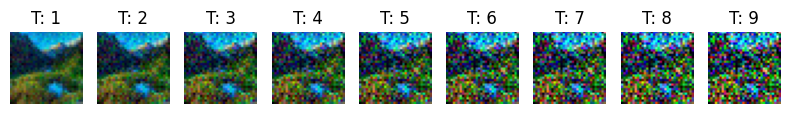

In [148]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(8, 4))
axes = axes.flatten()

for i in range(len(timesteps)):
    noisy_image = noise_scheduler.add_noise(image, noise, timesteps[i])
    
    ax = axes[i]
    ax.imshow(noisy_image.permute(1, 2, 0).numpy().clip(0, 1))
    ax.axis('off')
    ax.set_title(f"T: {timesteps[i].item()}")
    

plt.tight_layout()
plt.show()
